In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 

In [26]:
%matplotlib inline

In [28]:
# Load dataset
df = pd.read_csv('top50.csv', encoding='utf-8')
# Save in UTF-8
df.to_csv('top50.csv', index=False, encoding='utf-8')

In [30]:
df.head()

,id,track_name,artist_name,genre,bpm,energy,danceability,loudness_db,liveness,valence,length,acousticness,speechiness,popularity
0,1,SeÃ±orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


# datatypes

In [33]:
df.dtypes

id               int64
track_name      object
artist_name     object
genre           object
bpm              int64
energy           int64
danceability     int64
loudness_db      int64
liveness         int64
valence          int64
length           int64
acousticness     int64
speechiness      int64
popularity       int64
dtype: object

In [35]:
df['loudness_db'] = df['loudness_db'].astype(float)


In [37]:
# Rename columns to snake_case for clarity and consistency
df.columns = [
    "id", "track_name", "artist_name", "genre", "bpm", "energy",
    "danceability", "loudness_db", "liveness", "valence", "length",
    "acousticness", "speechiness", "popularity"
]

df.columns

Index(['id', 'track_name', 'artist_name', 'genre', 'bpm', 'energy',
       'danceability', 'loudness_db', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [39]:
# Standardize genre names (lowercase and strip spaces)
df['genre'] = df['genre'].str.lower().str.strip()

# Replace sub-genres with broader categories
df['genre'] = df['genre'].replace({
    'reggaeton flow': 'reggaeton',
    'reggaeton': 'latin',
    'panamanian pop': 'pop',
    'canadian pop': 'pop',
    'dance pop': 'pop',
    'pop house': 'pop',
    'australian pop': 'pop',
    'electropop': 'pop',
    'canadian hip hop': 'hip hop',
    'atl hip hop': 'hip hop',
    'dfw rap': 'rap',
    'trap music': 'rap',
    'country rap': 'rap',
    'big room': 'edm',
    'r&b en espanol': 'r&b'
})


In [41]:
# Check for nulls
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

# View unique genres after cleaning
df['genre'].unique()

array(['pop', 'reggaeton', 'rap', 'latin', 'hip hop', 'escape room',
       'edm', 'boy band', 'r&b', 'brostep'], dtype=object)

In [43]:
df['artist_name'] = df['artist_name'].str.strip()
df['artist_name'].unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSALÃ\x8dA', 'Marshmello', 'Nicky Jam'],
      dtype=object)

#DATA CLEANING

In [46]:

df['artist_name'] = (
    df['artist_name']
    .str.replace(r'[Ã√]', ' ', regex=True)         
    .str.replace(r'\s+', ' ', regex=True)          
    .str.strip()                                   
)


In [48]:
# Clean weird characters from track_name (replace with space)
df['track_name'] = df['track_name'].str.replace(r'[^\x00-\x7F]+', ' ', regex=True)

In [50]:
# Top 10 happiest songs by valence
# Valence measures how positive a song sounds
valence_songs = df.sort_values(by='valence', ascending=False)
display(valence_songs[['track_name', 'genre', 'valence', 'bpm']].head(10))

,track_name,genre,valence,bpm
38,Sucker,boy band,95,138
29,QUE PRETENDES,latin,94,93
37,Antisocial (with Travis Scott),pop,91,152
17,Sunflower - Spider-Man: Into the Spider-Verse,rap,91,90
25,If I Can't Have You,pop,87,124
5,I Don't Care (with Justin Bieber),pop,84,102
46,Te Robar,latin,80,176
23,Soltera - Remix,latin,80,92
13,Otro Trago - Remix,pop,76,176
44,Con Altura,r&b,75,98


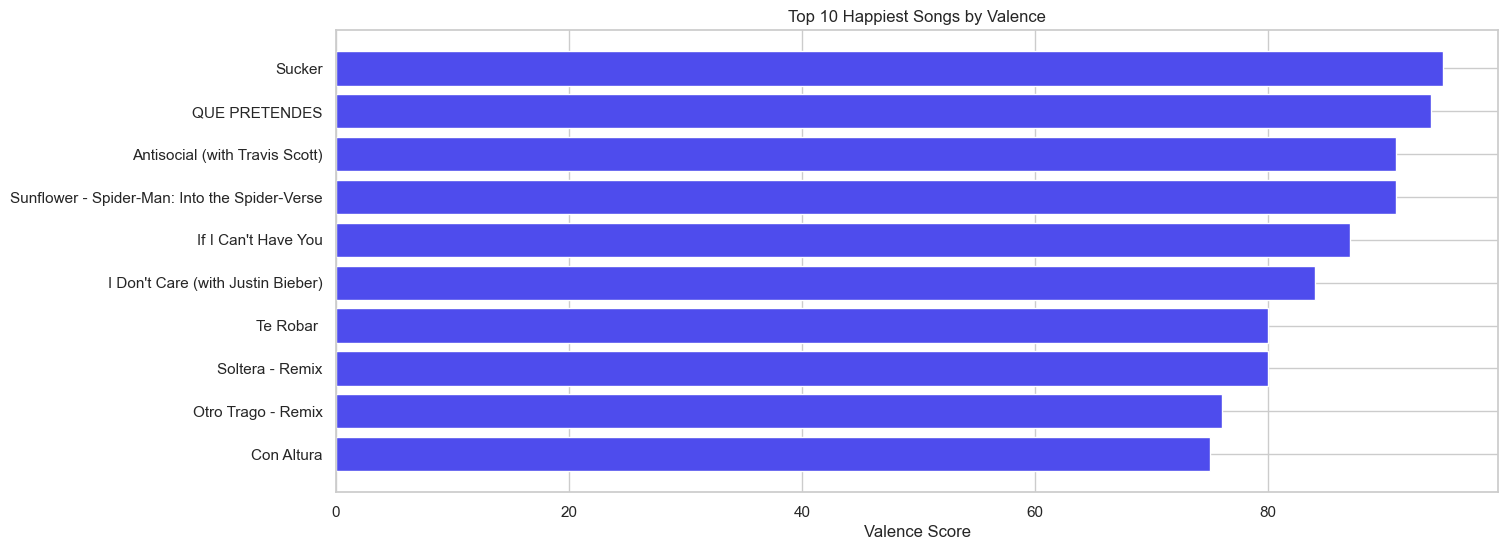

In [130]:
top_10_valence_songs = valence_songs[['track_name', 'valence']].head(10)

# Plotting
plt.figure(figsize=(15, 6))
plt.barh(top_10_valence_songs['track_name'], top_10_valence_songs['valence'], color='#4E4CED')
plt.xlabel('Valence Score')
plt.title('Top 10 Happiest Songs by Valence')
plt.gca().invert_yaxis()  # Since it's a horizontal bar chart

# Displaying the plot
plt.savefig("chards/happiest_songs_by_valence.png", transparent=True, format="png")
plt.show()

In [92]:
df.dtypes

id                int64
track_name       object
artist_name      object
genre            object
bpm               int64
energy            int64
danceability      int64
loudness_db     float64
liveness          int64
valence           int64
length            int64
acousticness      int64
speechiness       int64
popularity        int64
dtype: object

In [94]:
# Most high-valence songs are pop and latin genres.
# These tracks sound happier, with valence > 75 and varied BPMs.
# Supports the hypothesis that pop/latin fit party/workout vibes.

In [54]:
# Top 10 fastest songs by BPM (energy indicator)
bpm_songs = df.sort_values(by='bpm', ascending=False)
display(bpm_songs[['track_name', 'genre', 'valence', 'bpm']].head(10))  # Show top 10

,track_name,genre,valence,bpm
2,boyfriend (with Social House),pop,70,190
6,Ransom,rap,23,180
10,Callaita,latin,24,176
36,Otro Trago,pop,62,176
46,Te Robar,latin,80,176
16,LA CANCI N,latin,43,176
13,Otro Trago - Remix,pop,76,176
19,Truth Hurts,escape room,41,158
21,Panini,rap,48,154
37,Antisocial (with Travis Scott),pop,91,152


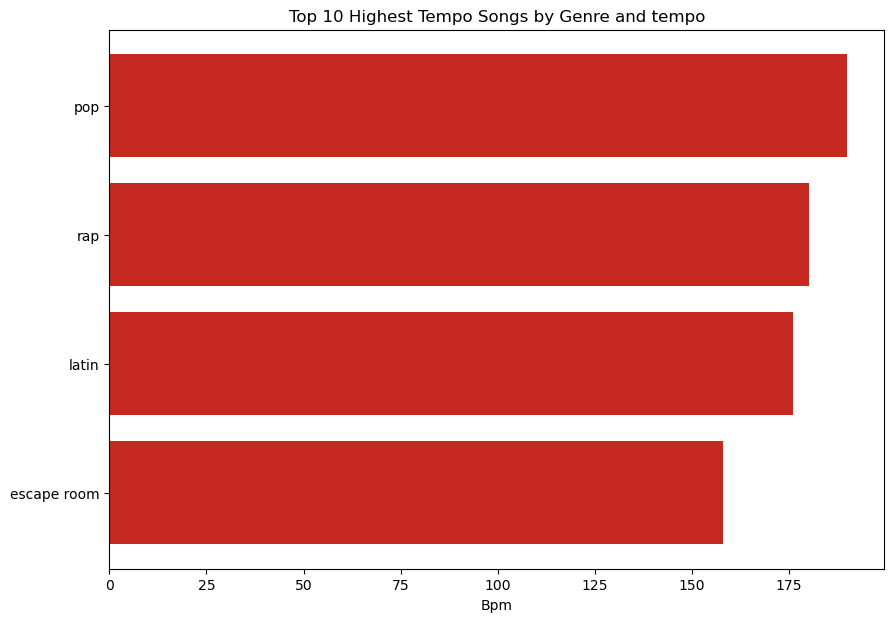

In [56]:

bpm_songs = df.sort_values(by='bpm', ascending=False)[['genre', 'valence', 'bpm']].head(10)

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(bpm_songs['genre'], bpm_songs['bpm'], color='#C62922')
plt.xlabel('Bpm')
plt.title('Top 10 Highest Tempo Songs by Genre and tempo')
plt.gca().invert_yaxis() 

# Displaying the plot
plt.savefig("highest10_tempo_by_genre_tempo.png", transparent=True, format="png")
plt.show()


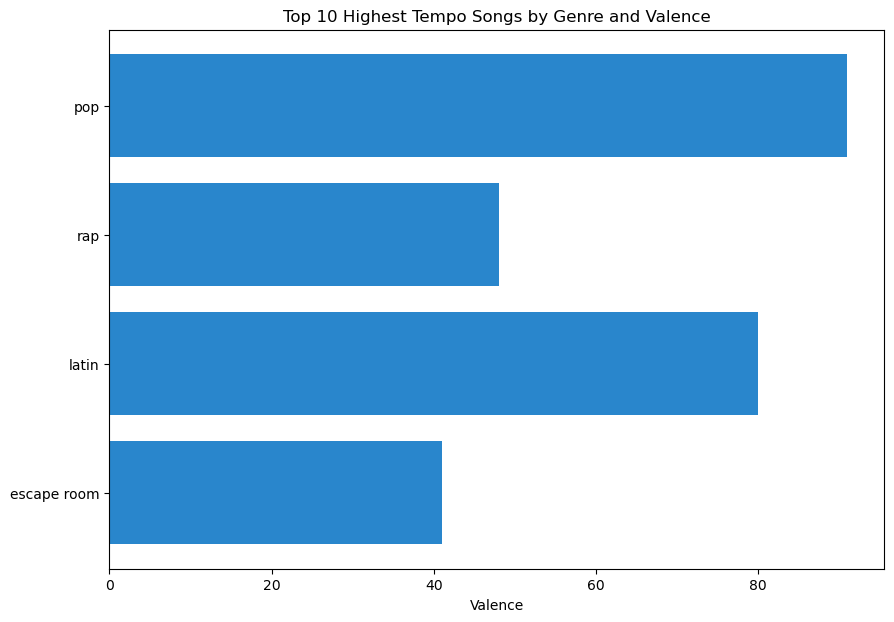

In [58]:
bpm_songs = df.sort_values(by='bpm', ascending=False)[['genre', 'valence', 'bpm']].head(10)

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(bpm_songs['genre'], bpm_songs['valence'], color='#2986cc')
plt.xlabel('Valence')
plt.title('Top 10 Highest Tempo Songs by Genre and Valence')
plt.gca().invert_yaxis() 

# Displaying the plot

plt.savefig("chards/tempo_by_genre_valence.png", transparent=True, format="png")
plt.show()


In [60]:
# Most high-BPM tracks are pop, latin, and rap.
# High BPM often aligns with high energy, ideal for workout playlists.
# Confirms that these genres contribute to energetic vibes.

In [62]:
# Count genres for songs with high valence and danceability
# Filter for songs with high valence (>80) and danceability (>70)
# These thresholds help identify upbeat, danceable tracks ideal for party/workout playlists
high_valence_dance = df[(df['valence'] > 80) & (df['danceability'] > 70)]
high_valence_dance['genre'].value_counts()

genre
pop         2
rap         1
boy band    1
Name: count, dtype: int64

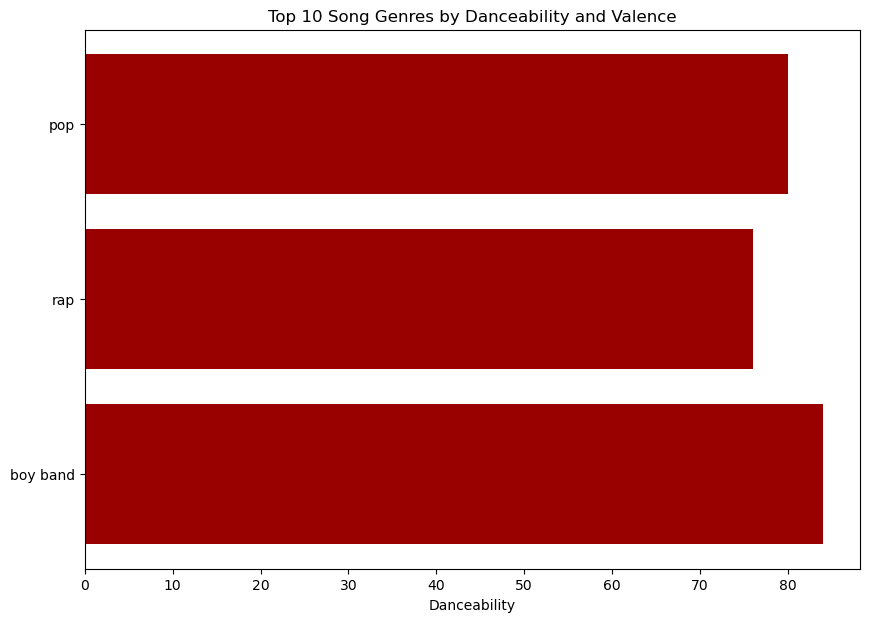

In [64]:
import matplotlib.pyplot as plt

# Select top 10 songs with high valence and danceability
high_valence_dance = df[(df['valence'] > 80) & (df['danceability'] > 70)].head(10)

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(high_valence_dance['genre'], high_valence_dance['danceability'], color='#990000')
plt.xlabel('Danceability')
plt.title('Top 10 Song Genres by Danceability and Valence')
plt.gca().invert_yaxis()

# Displaying the plot
plt.savefig("chards/top10_danceability_valence.png", transparent=True, format="png")
plt.show()

In [25]:
# Pop appears most often among songs with both high valence and danceability.
# Suggests pop is a strong fit for upbeat, danceable playlists.

In [26]:
# Genres like boy band, R&B, and Latin show the highest avg valence & danceability — great for upbeat playlists.

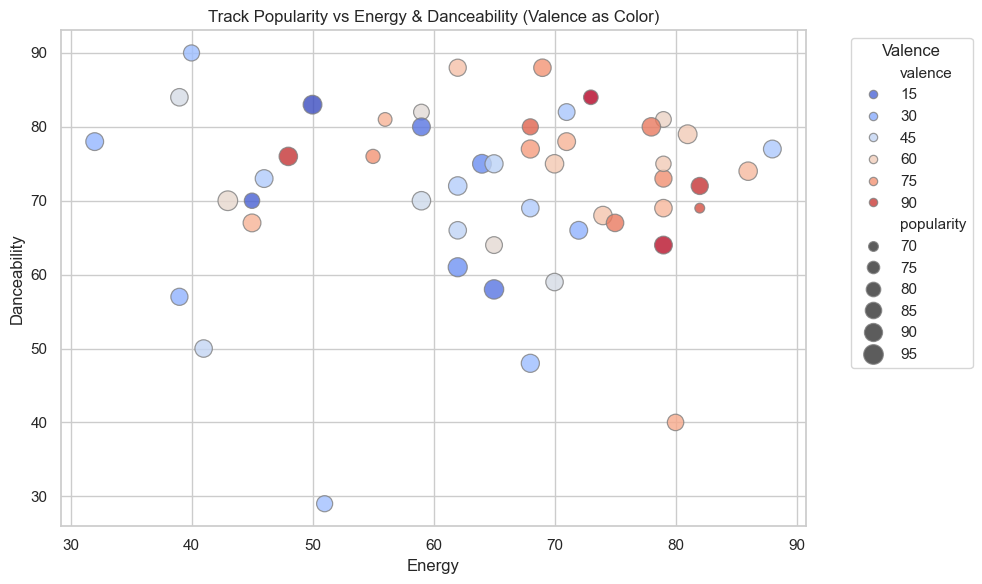

In [128]:

# Select the top 10 most popular tracks with energy and danceability
top_tracks = df[['track_name', 'popularity', 'energy', 'danceability']]\
    .sort_values(by='popularity', ascending=False)\
    .head(10)

# Create a scatterplot to visualize popularity vs energy and danceability, with valence as color

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='energy',
    y='danceability',
    hue='valence',
    size='popularity',
    sizes=(50, 200),
    palette='coolwarm',
    alpha=0.8,
    edgecolor='gray'
)

plt.title("Track Popularity vs Energy & Danceability (Valence as Color)")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.legend(title='Valence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("chards/track_popularity_energy_danceability_valenceicolored.png", transparent=True, format="png")

plt.show()


- this scatter shows which popular songs are both energetic and danceable

- Targeting party/workout playlist selections

- It shows high popularity related with high energy,if you spot high popularity with low energy, that may signal more chill hits

# TABLE EXPORT & IMPORT TO MYSQL encoding

## Processing artists

In [66]:
artist_map_dict = {artist: index+1 for index, artist in enumerate(df['artist_name'].unique())}
df['artist_id'] = df['artist_name'].map(artist_map_dict)

In [68]:
artists_df = pd.DataFrame({"artist_id": [value for value in artist_map_dict.values()],
              "artist_name": [key for key in artist_map_dict.keys()]})
artists_df

,artist_id,artist_name
0,1,Shawn Mendes
1,2,Anuel AA
2,3,Ariana Grande
3,4,Ed Sheeran
4,5,Post Malone
5,6,Lil Tecca
6,7,Sam Smith
7,8,Lil Nas X
8,9,Billie Eilish
9,10,Bad Bunny


## Processing genres

In [71]:
genre_map_dict = {genre: index+1 for index, genre in enumerate(df['genre'].unique())}
df['genre_id'] = df['genre'].map(genre_map_dict)

In [73]:
genre_df = pd.DataFrame({"genre_id": [value for value in genre_map_dict.values()],
              "genre_name": [key for key in genre_map_dict.keys()]})
genre_df

,genre_id,genre_name
0,1,pop
1,2,reggaeton
2,3,rap
3,4,latin
4,5,hip hop
5,6,escape room
6,7,edm
7,8,boy band
8,9,r&b
9,10,brostep


In [75]:
# Save unique, cleaned artist names
# artists_df.drop_duplicates()...
df[['artist_name']]\
  .drop_duplicates()\
  .sort_values(by='artist_name')\
  .to_csv("artists.csv", index=False, encoding='utf-8-sig', sep=";")
print("Cleaned artist names saved to artists.csv with adjustments.")

Cleaned artist names saved to artists.csv with adjustments.


In [77]:

# Save unique genres
# genre_df.drop_duplicates()...
df[['genre']].drop_duplicates().sort_values(by='genre').to_csv("genres.csv", index=False, encoding='utf-8', sep=";")

# Save full track data (with text artist and genre names for mapping)
track_columns = [
    'track_name', 'bpm', 'energy', 'danceability', 'loudness_db',
    'liveness', 'valence', 'length', 'acousticness', 'speechiness',
    'popularity', 'artist_id', 'genre_id'
]

df[track_columns].to_csv("tracks.csv", index=False, encoding='utf-8', sep=";")

print("Files saved: artists.csv, genres.csv, tracks.csv")


Files saved: artists.csv, genres.csv, tracks.csv


In [79]:
!pip install mysql-connector-python

import mysql.connector


In [80]:
df["loudness_db"].dtype

dtype('float64')

#### 

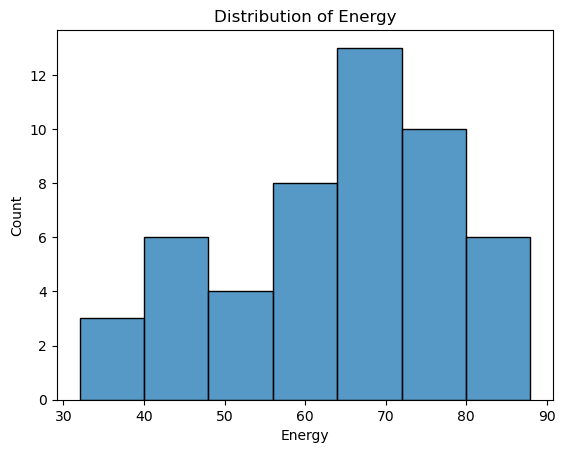